# fastqc

- FastQC reads a set of sequence files and produces from each one a quality control report consisting of a number of different modules, each one of which will help to identify a different potential type of problem in your data.

Env: Colab

Ref:
- Doc: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/

In [4]:
# Install Java
!sudo apt-get update
!sudo apt install default-jdk
!sudo apt install default-jre

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,448 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:13 https://developer.download.nvidia.com/compute/machin

In [8]:
!java -version

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)


In [9]:
# Install Bioconda

! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
! chmod +x miniconda.sh
! bash ./miniconda.sh -b -f -p /usr/local
! rm miniconda.sh
! conda config --add channels conda-forge
! conda config --add channels bioconda
! conda install -y mamba
! mamba update -qy --all
! mamba clean -qafy
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-01 19:12:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>]  84.90M   251MB/s    in 0.3s    

2023-02-01 19:12:01 (251 MB/s) - ‘miniconda.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
    - chardet==4.0.0=py37h06a4308_1003
    - conda-package-ha

In [10]:
!conda --version
!conda config --show channels

conda 22.9.0
channels:
  - bioconda
  - conda-forge
  - defaults


In [13]:
!conda install -y -c bioconda fastqc

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fastqc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alsa-lib-1.2.8             |       h166bdaf_0         578 KB  conda-forge
    cairo-1.16.0               |    ha61ee94_1014         1.5 MB  conda-forge
    expat-2.5.0                |       h27087fc_0         189 KB  conda-forge
    fastqc-0.11.9              |       hdfd78af_1         9.7 MB  bioconda
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB

In [18]:
!fastqc --version

FastQC v0.11.9


## get Reads
- Illumina MiSeq paired end sequencing
- https://www.ebi.ac.uk/ena/browser/view/SRR957824

In [15]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957824/SRR957824_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957824/SRR957824_2.fastq.gz

--2023-02-01 19:30:46--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957824/SRR957824_1.fastq.gz
           => ‘SRR957824_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR957/SRR957824 ... done.
==> SIZE SRR957824_1.fastq.gz ... 177900303
==> PASV ... done.    ==> RETR SRR957824_1.fastq.gz ... done.
Length: 177900303 (170M) (unauthoritative)

SRR957824_1.fastq.g 100%[===================>] 169.66M  35.5MB/s    in 5.8s    

2023-02-01 19:30:53 (29.0 MB/s) - ‘SRR957824_1.fastq.gz’ saved [177900303]

--2023-02-01 19:30:53--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR957/SRR957824/SRR957824_2.fastq.gz
           => ‘SRR957824_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|19

In [17]:
!ls

sample_data  SRR957824_1.fastq.gz  SRR957824_2.fastq.gz


## Experiments

In [19]:
!fastqc -h


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [20]:
#  fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 

!fastqc SRR957824_1.fastq.gz SRR957824_2.fastq.gz

Started analysis of SRR957824_1.fastq.gz
Approx 5% complete for SRR957824_1.fastq.gz
Approx 10% complete for SRR957824_1.fastq.gz
Approx 15% complete for SRR957824_1.fastq.gz
Approx 20% complete for SRR957824_1.fastq.gz
Approx 25% complete for SRR957824_1.fastq.gz
Approx 30% complete for SRR957824_1.fastq.gz
Approx 35% complete for SRR957824_1.fastq.gz
Approx 40% complete for SRR957824_1.fastq.gz
Approx 45% complete for SRR957824_1.fastq.gz
Approx 50% complete for SRR957824_1.fastq.gz
Approx 55% complete for SRR957824_1.fastq.gz
Approx 60% complete for SRR957824_1.fastq.gz
Approx 65% complete for SRR957824_1.fastq.gz
Approx 70% complete for SRR957824_1.fastq.gz
Approx 75% complete for SRR957824_1.fastq.gz
Approx 80% complete for SRR957824_1.fastq.gz
Approx 85% complete for SRR957824_1.fastq.gz
Approx 90% complete for SRR957824_1.fastq.gz
Approx 95% complete for SRR957824_1.fastq.gz
Analysis complete for SRR957824_1.fastq.gz
Started analysis of SRR957824_2.fastq.gz
Approx 5% complete fo

In [21]:
!ls

sample_data		 SRR957824_1.fastq.gz	  SRR957824_2.fastq.gz
SRR957824_1_fastqc.html  SRR957824_2_fastqc.html
SRR957824_1_fastqc.zip	 SRR957824_2_fastqc.zip


In [41]:
!unzip SRR957824_1_fastqc.zip
!unzip SRR957824_2_fastqc.zip

Archive:  SRR957824_1_fastqc.zip
   creating: SRR957824_1_fastqc/
   creating: SRR957824_1_fastqc/Icons/
   creating: SRR957824_1_fastqc/Images/
  inflating: SRR957824_1_fastqc/Icons/fastqc_icon.png  
  inflating: SRR957824_1_fastqc/Icons/warning.png  
  inflating: SRR957824_1_fastqc/Icons/error.png  
  inflating: SRR957824_1_fastqc/Icons/tick.png  
  inflating: SRR957824_1_fastqc/summary.txt  
  inflating: SRR957824_1_fastqc/Images/per_base_quality.png  
  inflating: SRR957824_1_fastqc/Images/per_sequence_quality.png  
  inflating: SRR957824_1_fastqc/Images/per_base_sequence_content.png  
  inflating: SRR957824_1_fastqc/Images/per_sequence_gc_content.png  
  inflating: SRR957824_1_fastqc/Images/per_base_n_content.png  
  inflating: SRR957824_1_fastqc/Images/sequence_length_distribution.png  
  inflating: SRR957824_1_fastqc/Images/duplication_levels.png  
  inflating: SRR957824_1_fastqc/Images/adapter_content.png  
  inflating: SRR957824_1_fastqc/fastqc_report.html  
  inflating: SRR95

/content/SRR957824_1_fastqc/Images/per_sequence_gc_content.png


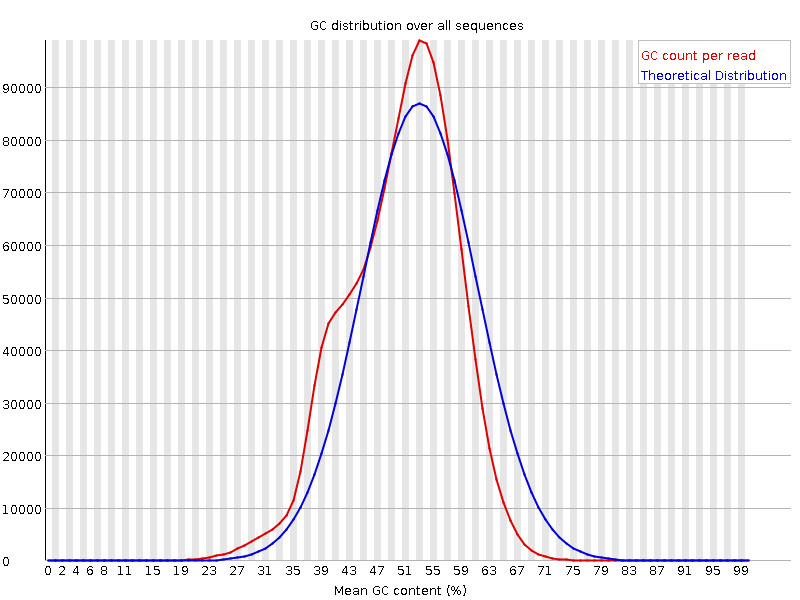

/content/SRR957824_1_fastqc/Images/sequence_length_distribution.png


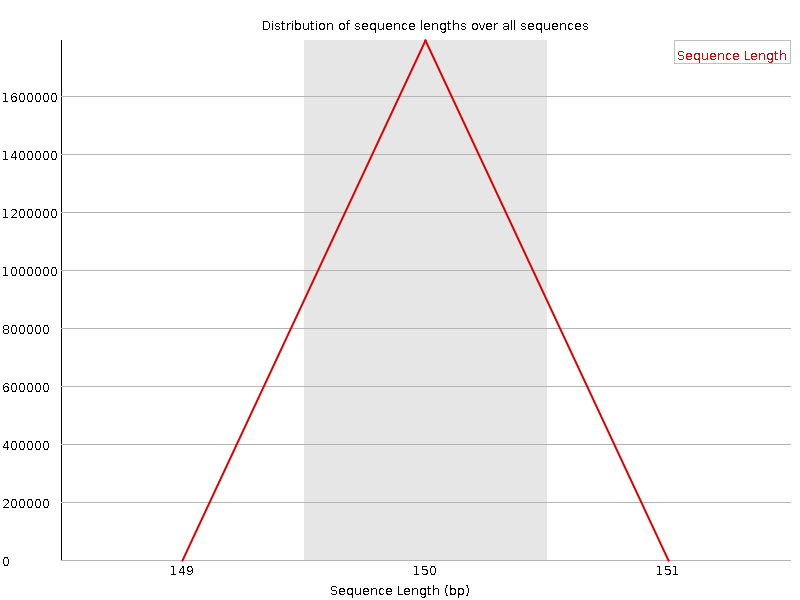

/content/SRR957824_1_fastqc/Images/per_sequence_quality.png


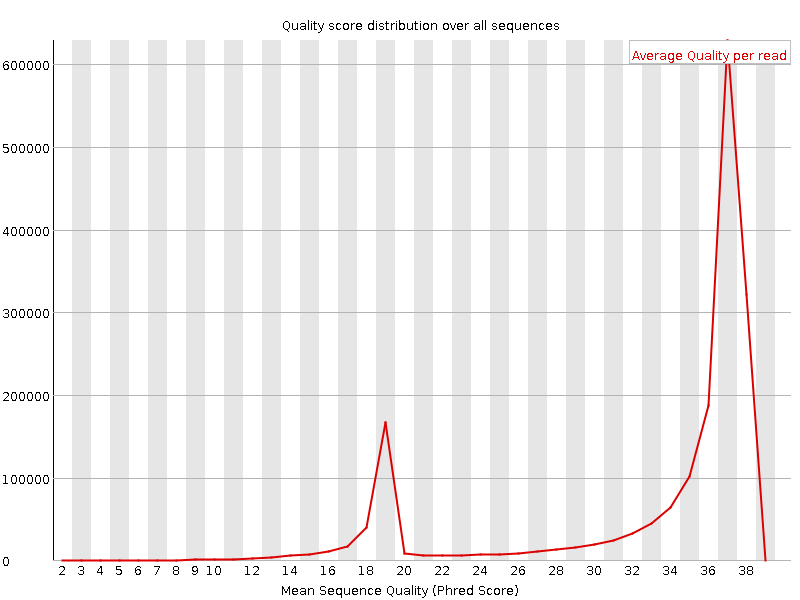

/content/SRR957824_1_fastqc/Images/duplication_levels.png


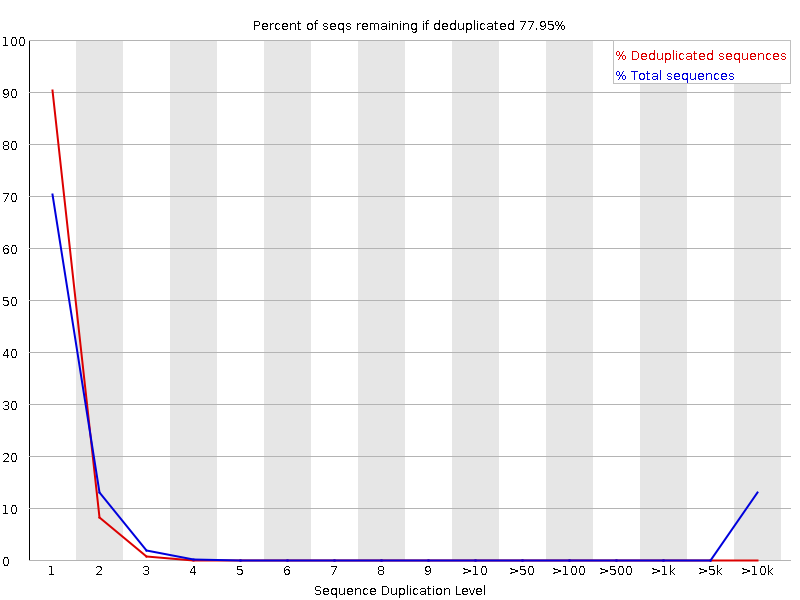

/content/SRR957824_1_fastqc/Images/per_base_n_content.png


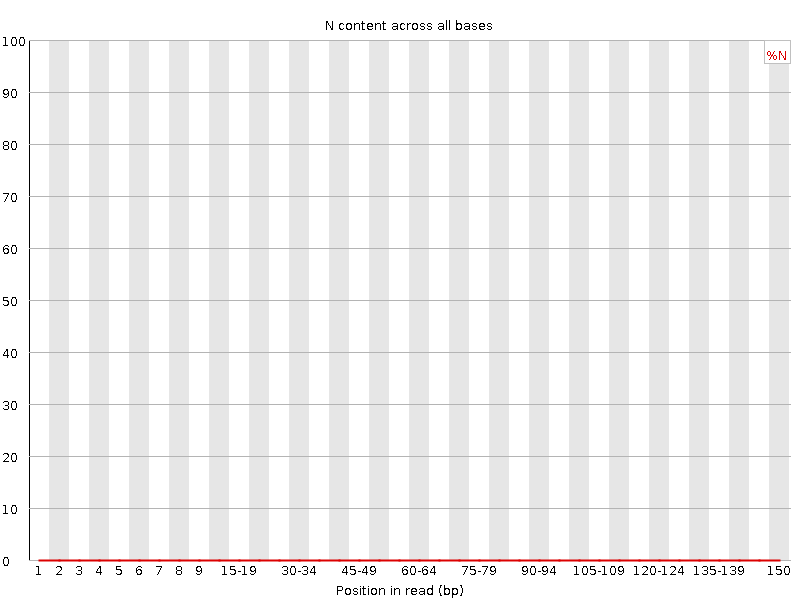

/content/SRR957824_1_fastqc/Images/adapter_content.png


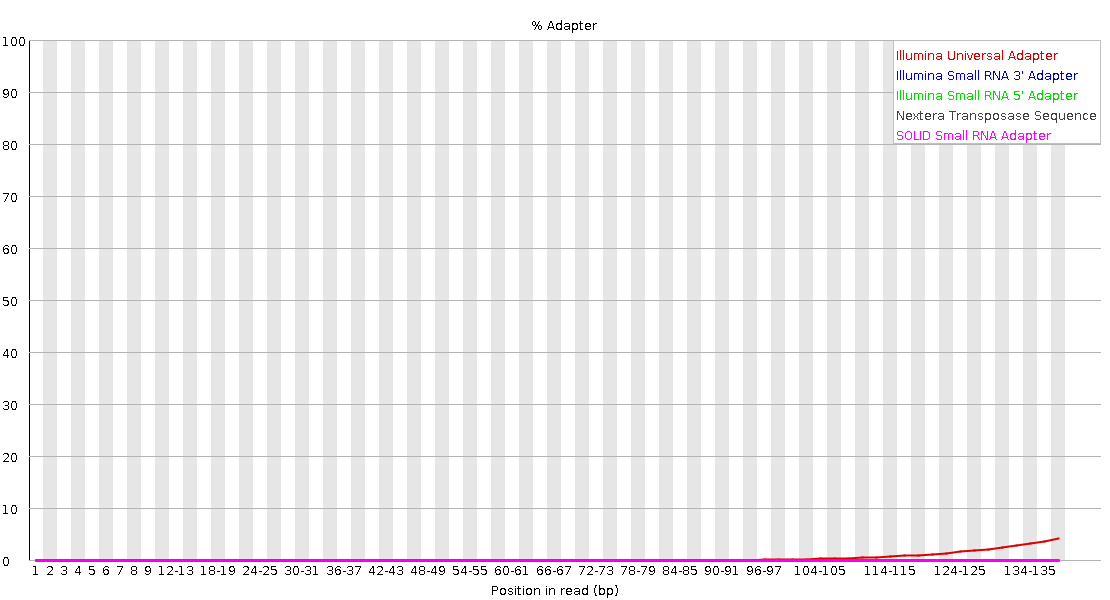

/content/SRR957824_1_fastqc/Images/per_base_sequence_content.png


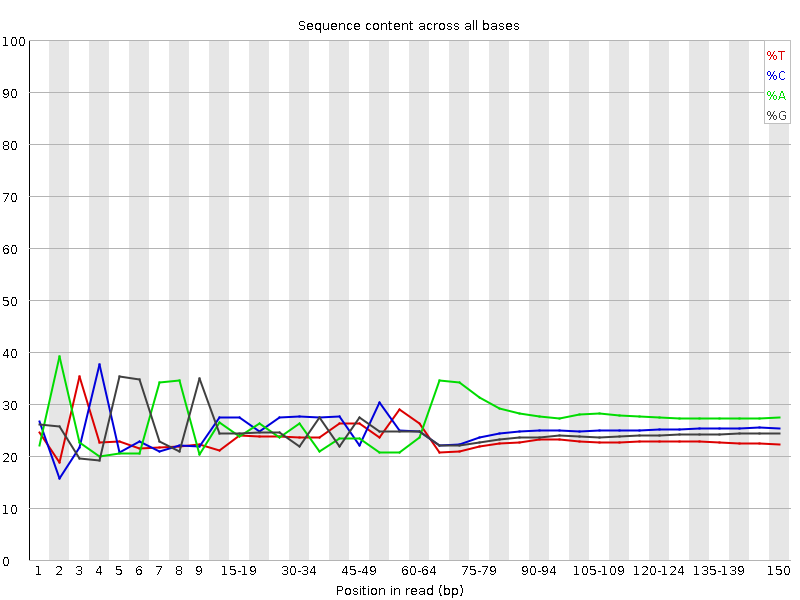

/content/SRR957824_1_fastqc/Images/per_base_quality.png


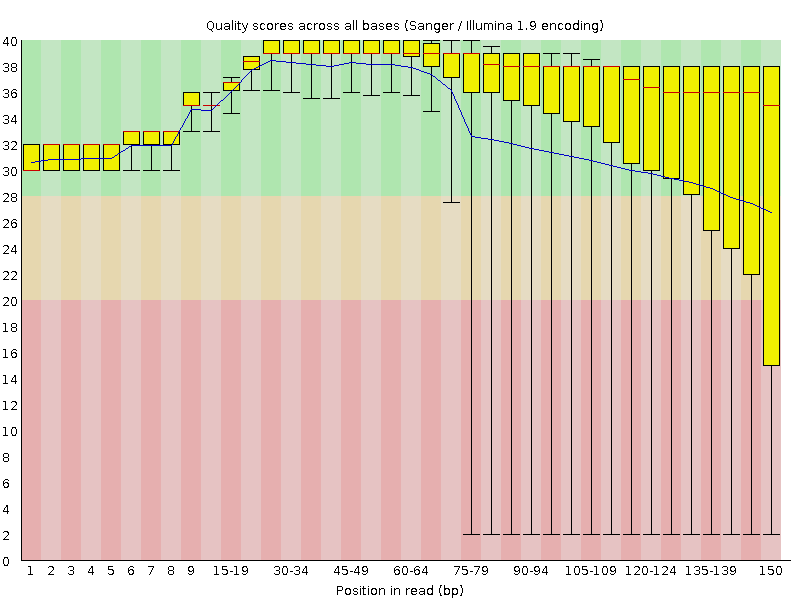

In [47]:
import os
from IPython.display import Image, display

for filename in os.scandir("/content/SRR957824_1_fastqc/Images/"):
    if filename.is_file():
        print(filename.path)
        display(Image(filename.path))

/content/SRR957824_2_fastqc/Images/per_sequence_gc_content.png


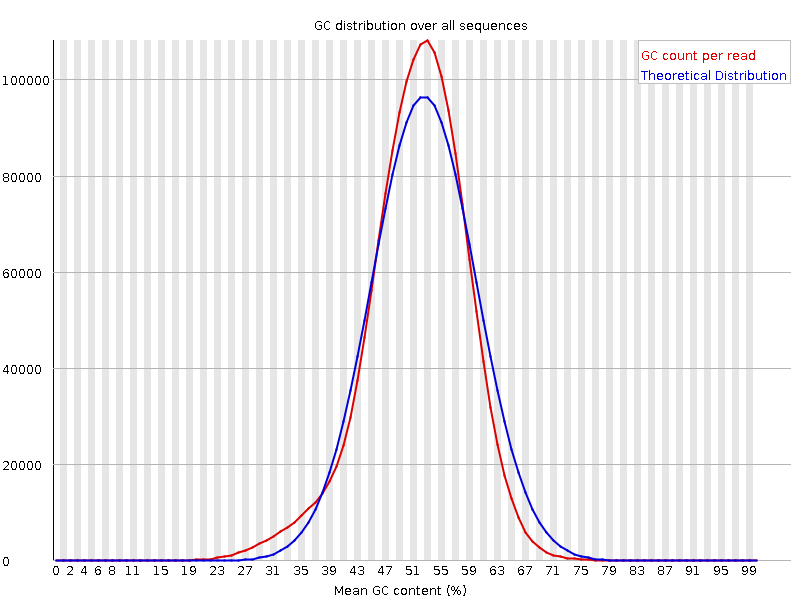

/content/SRR957824_2_fastqc/Images/sequence_length_distribution.png


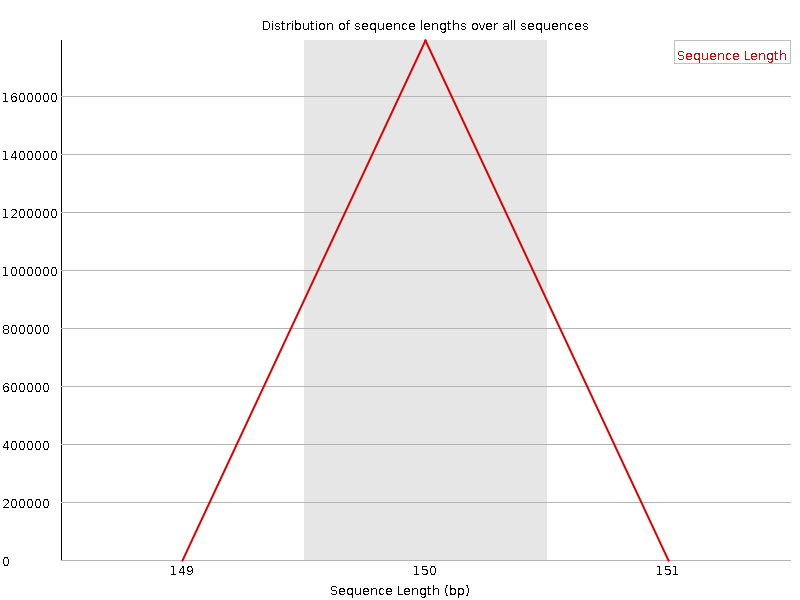

/content/SRR957824_2_fastqc/Images/per_sequence_quality.png


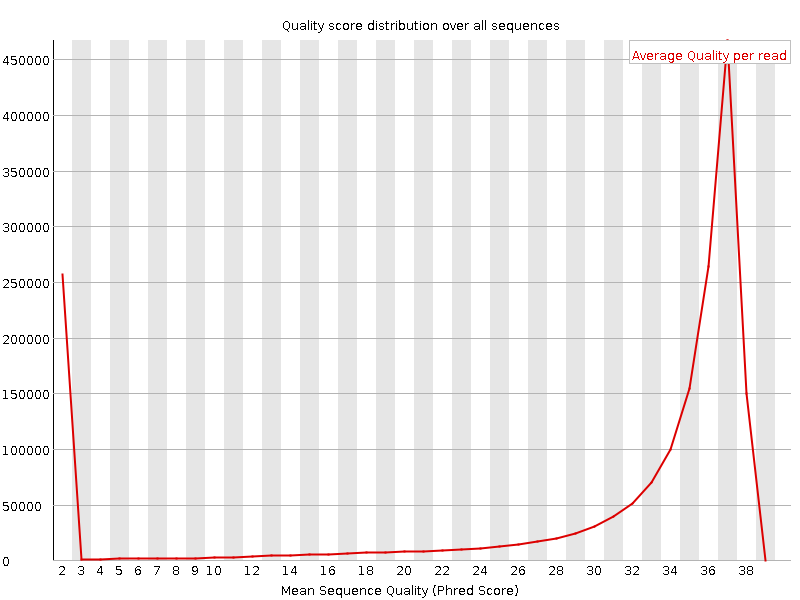

/content/SRR957824_2_fastqc/Images/duplication_levels.png


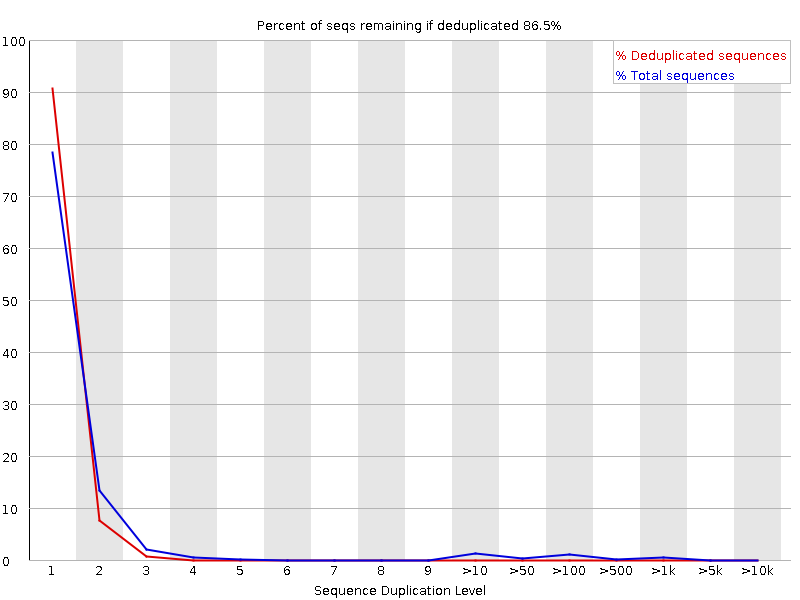

/content/SRR957824_2_fastqc/Images/per_base_n_content.png


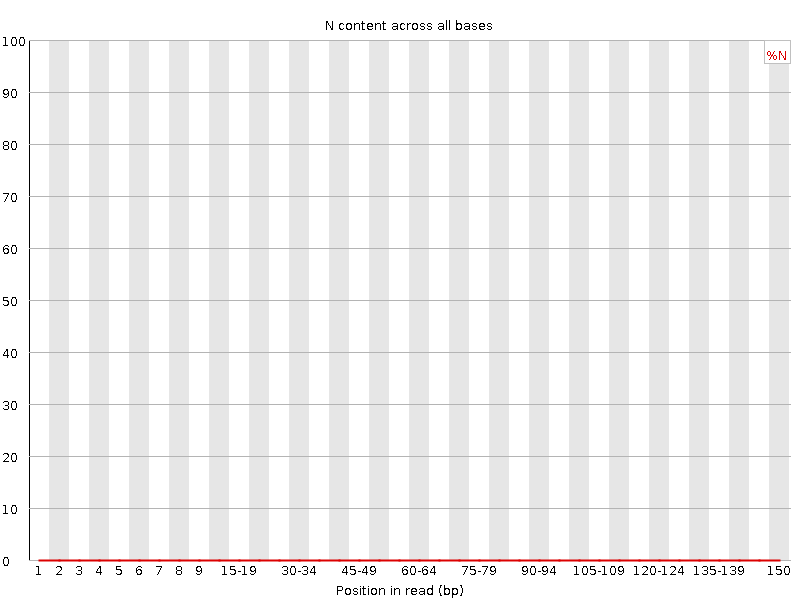

/content/SRR957824_2_fastqc/Images/adapter_content.png


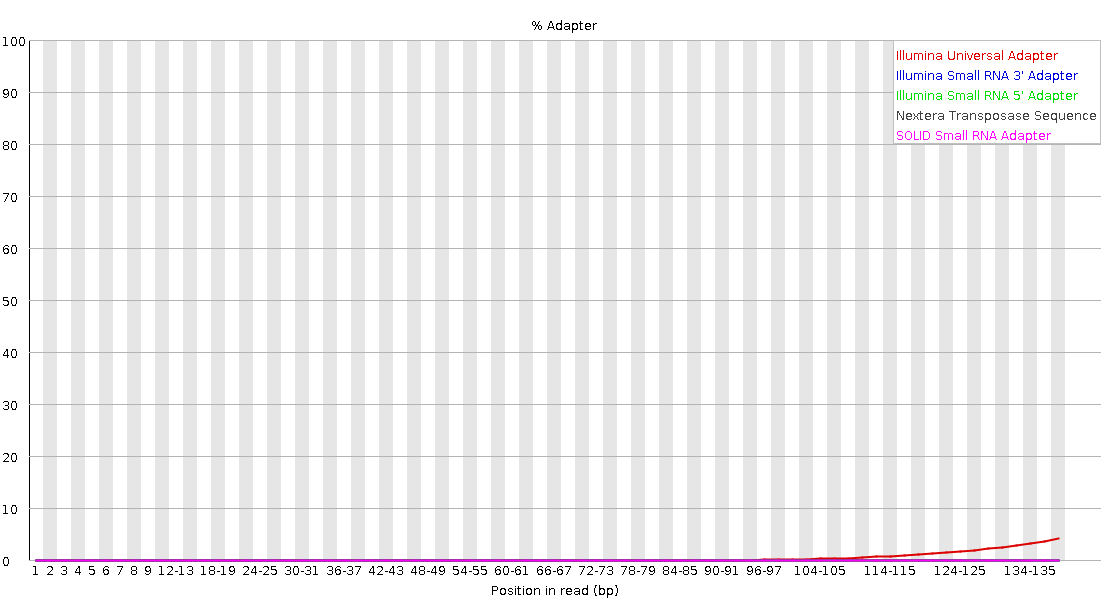

/content/SRR957824_2_fastqc/Images/per_base_sequence_content.png


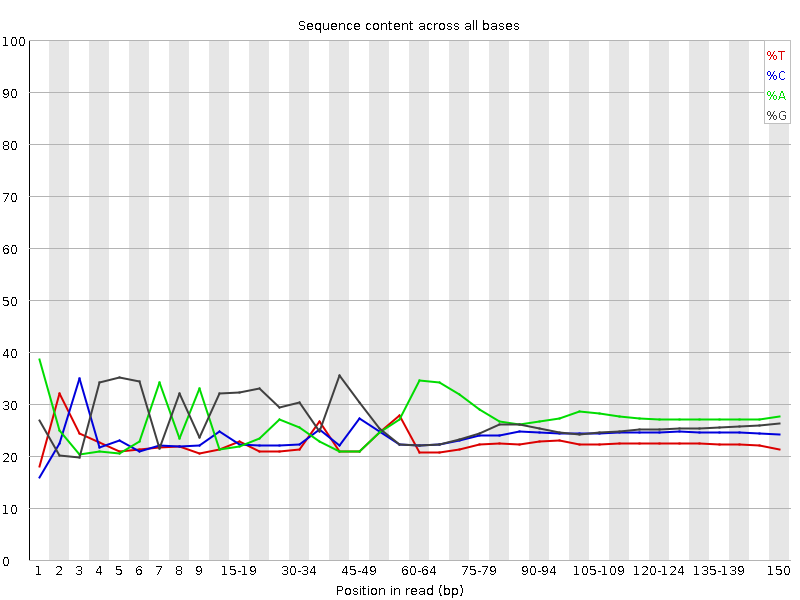

/content/SRR957824_2_fastqc/Images/per_base_quality.png


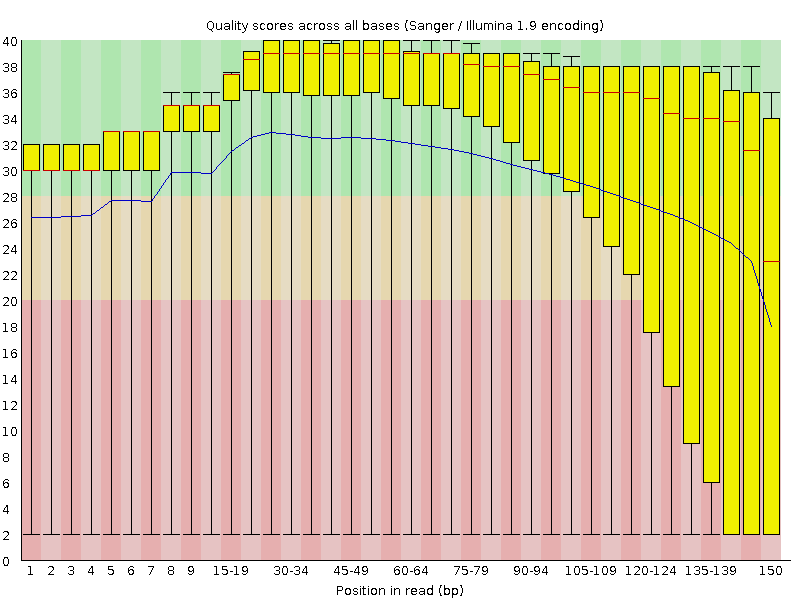

In [48]:
import os
from IPython.display import Image, display

for filename in os.scandir("/content/SRR957824_2_fastqc/Images/"):
    if filename.is_file():
        print(filename.path)
        display(Image(filename.path))